## Ajuste por maximización de Posterior

In [1]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

In [2]:
data = np.load('cosdata.npy') #Cargamos el archivo de datos
n = len(data[0])
va = np.var(data[1])

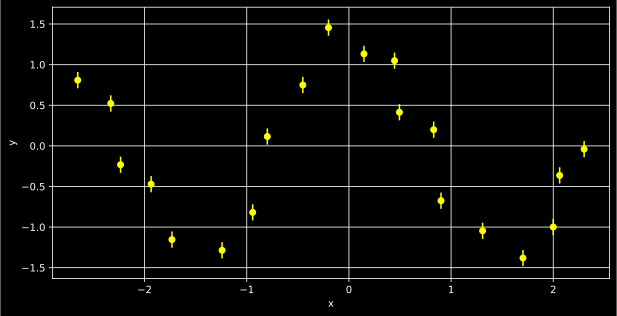

In [5]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (10,5)
plt.errorbar(data[0], data[1], 0.1, xerr = 0, fmt='o', color='yellow')
#plt.ylim((-7, 9))
#plt.xlim((0, 10.2))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

## Los datos aparentan ajustarse con una función coseno $acos(bx)+c$. Se usará el likelihood gaussiano, encontrando el valor de los parámetros que lo maximiza.
## Lo que buscamos es el posterior:
## $P(y,\theta) \propto P(y|\theta)P(\theta)$ donde $P(y|\theta)$ es el likelihood y $P(\theta)$ es el prior, que para este caso será plano, y el likelihood:
## $\mathbf{L} \; \propto \; \prod_{i}^{n}\frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(y_i-\lambda(x_i,\theta))^2}{2\sigma^2}}$
## $\ln{(\mathbf{L})} \; \propto \; -\frac{-n}{2}\ln{(2\pi \sigma^2)}-\frac{1}{2\sigma^2}\sum_i^n(y_i-\lambda(x_i,\theta))^2$
### Donde $\lambda(x_i,\theta)$ es el modelo y $\sigma^2$ la varianza de los $y_i$

In [6]:
def likeli(w3,w4,w5):
    llt = 0
    prior = 1                              #Aquí se define el prior
    ll = -(n/2)*np.log(2*np.pi*va)
    for i in range (n):
        fx = w3*np.cos(w4*data[0,i]) + w5             #Aquí va el modelo
        llt+= -(data[1,i]-fx)**2
    ll += (1/(2*va))*llt + np.log(prior)
    ll = np.exp(ll)
    return ll

In [7]:
def caminante(mm,camt,camt2,camt3):
    cami = np.array([camt[0]])
    cami2 = np.array([camt2[0]])
    cami3 = np.array([camt3[0]])
    aux = cami[0]
    aux2 = cami2[0]
    aux3 = cami3[0]
    tt = likeli(camt[0],camt2[0],camt[0])
    for j in range (mm-1):
        irma = np.random.normal(loc=aux, scale=0.2)        #Aquí se calculan números aleatorios de
        kari = np.random.normal(loc=aux2, scale=0.2)       #Distribución normal centrada en los valores iniciales
        soni = np.random.normal(loc=aux3, scale=0.2)
        camt[j+1] = irma                                   #Cada par de valores se guarda en estos arreglos                                                
        camt2[j+1] = kari
        camt3[j+1] = soni
        ttn = likeli(camt[j+1],camt2[j+1],camt3[j+1])
        if ttn>tt:
            cami = np.append(cami,irma)                    #Solo los exitosos se guardan en estos arreglos 
            cami2 = np.append(cami2,kari)                  #Para graficarlos después
            cami3 = np.append(cami3,soni)
            aux = irma
            aux2 = kari
            aux3 = soni
            tt = ttn
        else:
            ran = np.random.uniform(low=0.0, high=1.0)     #"Volado"
            if (abs(ttn/tt))>ran:
                cami = np.append(cami,irma)
                cami2 = np.append(cami2,kari)
                cami3 = np.append(cami3,soni)
                aux = irma
                aux2 = kari
                aux3 = soni
                tt = ttn
    return cami,cami2,cami3,camt,camt2,camt3

In [20]:
m = 9000                  #número de intentos de pasos del caminante
cam = np.zeros(m)         
cam2 = np.zeros(m)
cam3 = np.zeros(m)
cam[0] = 1
cam2[0] = 0.5
cam3[0] = 0
cam,cam2,cam3,camtt,camtt2,camtt3 = caminante(m,cam,cam2,cam3)

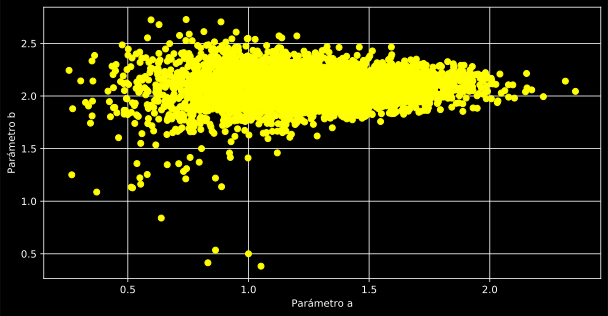

In [32]:
plt.rcParams['figure.figsize'] = (10,5)
plt.errorbar(cam, cam2, fmt='o', color='yellow')
#plt.ylim((0, 8))
#plt.xlim((-1.5, 0.5))
plt.xlabel('Parámetro a')
plt.ylabel('Parámetro b')
plt.grid()
plt.show()

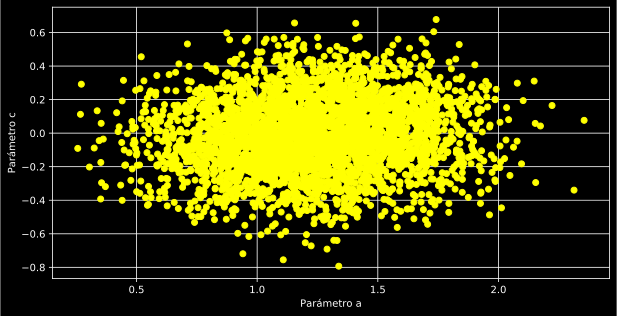

In [22]:
plt.rcParams['figure.figsize'] = (10,5)
plt.errorbar(cam, cam3, fmt='o', color='yellow')
#plt.ylim((0, 8))
#plt.xlim((-1.5, 0.5))
plt.xlabel('Parámetro a')
plt.ylabel('Parámetro c')
plt.grid()
plt.show()

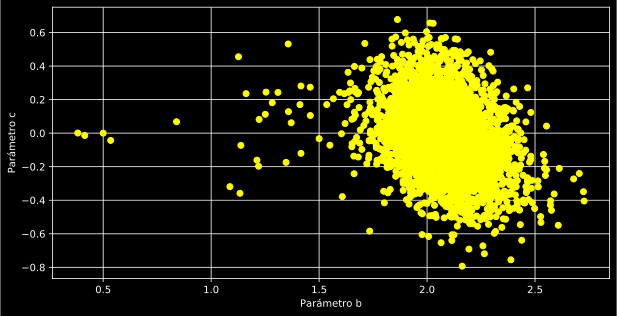

In [23]:
plt.rcParams['figure.figsize'] = (10,5)
plt.errorbar(cam2, cam3, fmt='o', color='yellow')
#plt.ylim((0, 8))
#plt.xlim((-1.5, 0.5))
plt.xlabel('Parámetro b')
plt.ylabel('Parámetro c')
plt.grid()
plt.show()

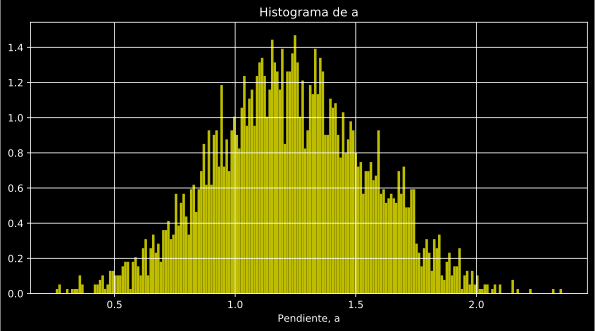

In [24]:
k, bins, patches = plt.hist(cam, 200, density=True, facecolor='y', alpha=1)
plt.xlabel('Pendiente, a')
#plt.ylabel('Probability')
plt.title('Histograma de a')
#plt.xlim(-1.5, -0.3)
plt.grid(True)
plt.show()

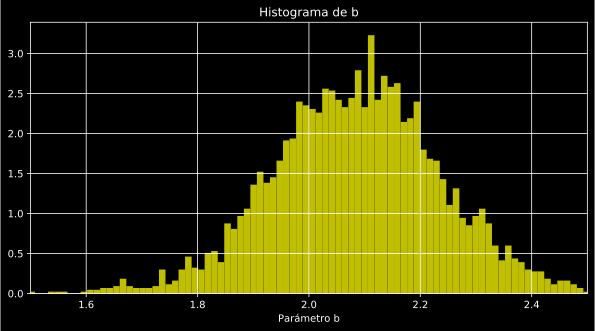

In [25]:
k, bins, patches = plt.hist(cam2, 200, density=True, facecolor='y', alpha=1)
plt.xlabel('Parámetro b')
#plt.ylabel('Probability')
plt.title('Histograma de b')
plt.xlim(1.5, 2.5)
plt.grid(True)
plt.show()

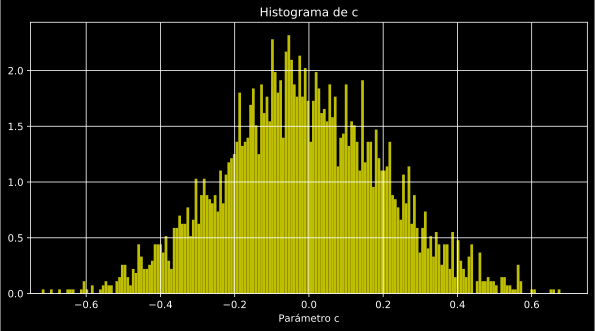

In [26]:
k, bins, patches = plt.hist(cam3, 200, density=True, facecolor='y', alpha=1)
plt.xlabel('Parámetro c')
#plt.ylabel('Probability')
plt.title('Histograma de c')
plt.xlim(-0.75, 0.75)
plt.grid(True)
plt.show()

In [27]:
a = np.mean(cam)
b = np.mean(cam2)
c = np.mean(cam3)

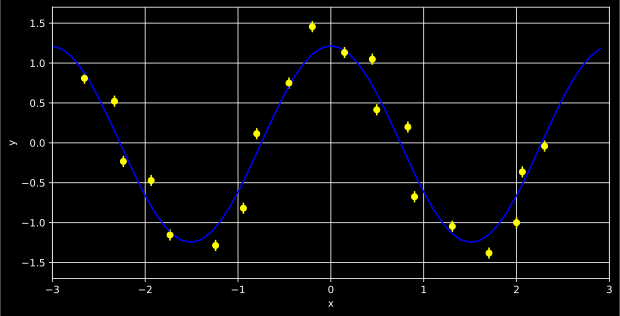

In [31]:
x = np.arange(-3,3,0.1)
plt.rcParams['figure.figsize'] = (10,5)
plt.errorbar(data[0], data[1], yerr=0.07, xerr = 0, fmt='o', color='yellow')
plt.plot(x,(a*np.cos(b*x) + c),color='blue')
plt.xlim((-3, 3))
plt.ylim((-1.7, 1.7))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()